# Entrega 3 - MLY0100

**Autor(es):** Javier Cerna, Luis Salamanca, y Vicente Solorza

**Correo Electrónico:** ja.cernac@duocuc.cl, lui.salamanca@duocuc.cl,  vi.solorza@duocuc.cl

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook contiene el desarrollo de la evaluación 3 de la asignatura optativa de Machine Learning de Duoc UC - Sede concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- pandas (2.2.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
!pip install kneed

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 17.9 MB 24.7 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=400139 sha256=6240ec98c456b561c1c987ef1c1aed596fdc0efd4274e9998b2b6ae0c74413ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-6y98j1oe/wheels/85/5d/45/8a23c7b77d2023fbc37490b8902f7fdeff5614f65d6e08b6c4
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=04239178519d5ea9e209935fa9fa6f5c62e006975ac767c45bd6632cd1f0a6d2
  Stored in direc

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

import plotly.express as px

from ydata_profiling import ProfileReport

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Fase 1 - Compresión del negocio

## 🎯 Objetivo General

El propósito de este proyecto es **segmentar a los clientes** del Banco Monopoly, recientemete adqurido por Dormammu, con base en sus características y comportamiento crediticio con objeto de generar **agrupaciones homogéneas** que faciliten la toma de decisiones estratégicas en áreas como marketing, riesgo y fidelización.

## 📌 Objetivos Específicos

- **Modelo 1**: Detectar grupos de clientes en función de su **capacidad económica y relación con la institución**, usando únicamente dos variables que capturen estas dimensiones.
- **Modelo 2**: Incorporar **variables de comportamiento transaccional** para generar una segmentación más rica y detallada.

---

## 🧠 Consideraciones del Negocio

- El banco Dormammu necesita herramientas que permitan entender **cómo se diferencian los clientes entre sí** más allá de los productos contratados.
- Estas segmentaciones deben ser **accionables y comprensibles** para los equipos no técnicos.
- El enfoque es **no supervisado**, ya que no se cuenta con una clasificación previa de clientes o una variable target.

---

## 🧮 Definición de Modelos y Variables

### 🔹 Modelo 1 – Segmentación Socioeconómica Básica

**Variables seleccionadas**:
- `Renta`: Ingreso mensual declarado del cliente.
- `Antigüedad`: Tiempo (en años) desde que el cliente ingresó a la institución.

**Justificación**:
- Ambas variables permiten identificar clientes con **alta capacidad económica** y **relaciones de largo plazo** con la entidad. Esto es clave para estrategias de retención, beneficios o riesgos crediticios.
- Son variables estables, por tanto, no dependen del comportamiento reciente.

---

### 🔹 Modelo 2 – Segmentación Comportamental Extendida

**Variables seleccionadas**:
- `Renta`: Indicador de capacidad económica.
- `Antigüedad`: Indicador de fidelidad/relación institucional.
- `Cupo_L1`: Límite de crédito autorizado para el cliente en la línea 1.
- `Txs_T12`: Número de transacciones realizadas por el cliente en el mes 12.

**Justificación**:
- Se busca integrar tanto el **perfil financiero** (capacidad y relación) como el **comportamiento de uso reciente del producto**.
- `Txs_T12` refleja **nivel de actividad reciente**, mientras que `Cupo_L1` puede actuar como proxy de confianza otorgada por la institución.

---

## ✅ Resultados esperados

- Obtención de grupos de clientes **internamente similares y externamente distintos**.
- Posibilidad de aplicar las segmentaciones en procesos de:
  - Definición de productos personalizados.
  - Campañas de marketing segmentadas.
  - Evaluación de riesgo crediticio.
  - Análisis de fidelización.

> Esta fase sienta las bases conceptuales para las decisiones posteriores del proyecto, asegurando alineamiento entre los objetivos técnicos y las metas del negocio.


# Fase 2 - Entendimiento de los datos

## 🎯 Objetivo de la Fase

El propósito de esta fase es **entender la estructura, calidad y comportamiento estadístico de las variables seleccionadas** para los modelos de clustering definidos previamente. Esto permitirá detectar posibles problemas de calidad de datos, outliers, distribuciones sesgadas o patrones relevantes.

---

## 🔍 Variables Seleccionadas para Exploración

La exploración descriptiva se centrará en las variables que componen los dos modelos definidos:

### 🔹 Modelo 1 – Clustering socioeconómico básico
- `Renta`
- `Antigüedad`

### 🔹 Modelo 2 – Clustering con comportamiento
- `Renta`
- `Antigüedad`
- `Cupo_L1`
- `Txs_T12`

---

## 🧪 Técnica de Exploración

Se utilizará la librería `pandas_profiling` (ahora conocida como `ydata-profiling`) para generar un **informe automático (`ProfileReport`)**, el cual proporciona:

- Estadísticos descriptivos (media, mediana, desviación estándar, etc.)
- Identificación de valores nulos y tipos de datos
- Detección de outliers potenciales
- Distribuciones y diagramas de densidad
- Matrices de correlación entre variables

---

## ✅ Resultados esperados

- Confirmar la calidad y tipo de datos de las variables seleccionadas
- Detectar la necesidad de:
  - Imputaciones
  - Transformaciones (escalado, normalización)
  - Tratamiento de valores extremos
- Validar que las variables son aptas para su uso en algoritmos de clustering como K-means

> Los hallazgos de esta fase fundamentarán la posterior **preparación de los datos** y permitirán realizar los primeros juicios sobre la estructura latente en los datos.

## Carga de los Datos

In [ ]:
!wget https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv

--2025-06-24 23:46:20--  https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6 [following]
--2025-06-24 23:46:20--  https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4946fd8bcd3b321a8c16a23155.dl.dropboxusercontent.com/cd/0/inline/CsSiDt_W06Tb2RR7fRmcOvnrjvO5BUYDiyA5r-P_HFFnsSIcE6VhbXVcw41Qcrd_8MCTxWQk8-Bu3Pd-jXW6TSS6_fQR9NO_vJrAgo9JbQsmXWVfl-l6nAlyRDef2mwFfNdKZ_ZTjbcOAalpoeH6oly7/file# [following]
--2025-06-24 23:46:20--  https://uc4946fd8bcd3b321a8c16a231

In [ ]:
data = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory = False)
data

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0,33000,0,1099866,0,1099866,15080,0,R,0
1,2,160,H,13.0,46,143640,69,1,0,0,...,0,300000,0,214592,0,214592,83596,0,R,0
2,3,170,H,13.0,45,929106,24,1,1,0,...,0,216676,0,0,0,7400,0,0,T,0
3,4,151,H,13.0,46,172447,134,0,1,0,...,0,60000,0,272762,0,272762,10591,0,R,0
4,5,170,H,13.0,46,805250,116,0,1,1,...,0,272925,0,249562,0,75339,377782,0,R,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978,57,1,1,1,...,0,300000,0,478320,0,478320,12668,0,R,0
51120,51121,170,H,13.0,51,625376,39,1,0,0,...,0,166098,0,166098,0,0,572363,0,R,0
51121,51122,160,H,13.0,47,806220,153,1,1,0,...,0,18891,0,9652,0,9652,16241,0,R,0
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,0,26528,0,24638,0,24638,84982,0,R,0


In [ ]:
perfil_renta = ProfileReport(data[['Renta']], title="Perfil de Renta", minimal=True)

perfil_renta.to_notebook_iframe()

perfil_antiguedad = ProfileReport(data[['Antiguedad']], title="Perfil de Antigüedad", minimal=True)

perfil_antiguedad.to_notebook_iframe()

perfil_txs_12 = ProfileReport(data[['Txs_T12']], title="Perfil de Transacciones Diciembre", minimal=True)

perfil_txs_12.to_notebook_iframe()

perfil_cupo_l1 = ProfileReport(data[['CUPO_L1']], title="Perfil del Cupo del Cliente", minimal=True)

perfil_cupo_l1.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 21.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 12.53it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 23.54it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 🔎 Análisis Estadístico de Variables Seleccionadas

Como parte de la **fase de comprensión de los datos** se analizan los principales estadísticos de las variables que componen el **Modelo 2** de clustering (Renta, Antigüedad, Cupo_L1 y Txs_T12).

---

## 🟡 `Txs_T12` – Número de Transacciones en el mes 12

- **Mediana**: 1
- **Media**: 2.59
- **Máximo**: 56
- **Mínimo**: -2
- **Desviación estándar**: 3.75
- **Asimetría (Skewness)**: 2.96
- **Curtosis**: 13.94
- **Coeficiente de variación (CV)**: 1.45

### 🔍 Observaciones

- La **mediana baja (1)** y el **Q1 = 0** sugieren que una gran proporción de clientes realizó pocas o ninguna transacción.
- Se detectan **valores negativos**, lo que no tiene sentido en una variable de conteo: deben ser tratados (imputados o reemplazados).
- La **alta asimetría** y **curtosis** indican que la mayoría de los valores son bajos y existen outliers con actividad muy alta.
- Por su distribución, esta variable **contribuye a identificar diferencias de comportamiento entre usuarios activos e inactivos.**

---

## 🟠 `Cupo_L1` – Límite de crédito autorizado

- **Mediana**: 800,000
- **Media**: 1,133,186
- **Máximo**: 21,534,000
- **Mínimo**: 0
- **IQR**: 1,127,000
- **Desviación estándar**: 1,076,922
- **Asimetría**: 2.66
- **Curtosis**: 16.25

### 🔍 Observaciones

- El **rango de valores es muy amplio** con un máximo más de 26 veces mayor que la mediana: fuerte dispersión y presencia de valores extremos.
- La distribución está **altamente sesgada a la derecha**. Esto puede afectar modelos sensibles a escala como K-means.
- Esta variable puede reflejar la **confianza que la institución tiene en el cliente**, por lo que es útil para enriquecer los clusters.

---

## 🔵 `Antigüedad` – Tiempo desde ingreso a la institución (en meses)

- **Mediana**: 25
- **Media**: 38.89
- **Máximo**: 324
- **Mínimo**: 6
- **IQR**: 40
- **Desviación estándar**: 35.67
- **Asimetría**: 1.78
- **Curtosis**: 3.55

### 🔍 Observaciones

- La mayoría de los clientes tiene **antigüedad baja o media** con pocos casos muy antiguos.
- La **asimetría positiva** sugiere que hay un grupo reducido de clientes con muchos años de relación.
- Puede aportar información sobre la **lealtad y madurez de la relación financiera**.

---

## 🔴 `Renta` – Ingreso mensual declarado

> Se detectó que esta variable está almacenada como **string**, por lo que será necesario **convertirla a formato numérico** antes de cualquier análisis estadístico o modelado.

---

## ✅ Pasos a seguir

- Imputar valores negativos y nulos en `Txs_T12` usando la **mediana**, dado su sesgo.
- Aplicar **escalado estándar o normalización** para todas las variables, ya que difieren significativamente en rango y dispersión.
- Considerar transformaciones logarítmicas si se desea mitigar el efecto de los valores extremos.

> Estas observaciones forman la base para la **fase de preparación**, donde se limpiarán, transformarán y escalarán las variables antes de aplicarlas a modelos de clustering.


# Fase 3 - Preparación de datos

En esta etapa se realizan las transformaciones necesarias para asegurar la calidad y adecuación de los datos antes de aplicar modelos de clustering. A continuación, se describen los pasos realizados sobre las variables seleccionadas:

---

### 🔹 Renta

- La variable `Renta` se encuentra originalmente en formato string, por lo cual se elimina cualquier carácter no numérico y se convierte al tipo numérico.
- Una vez convertida, se imputan los valores nulos utilizando la mediana, dado que esta medida es menos sensible a valores extremos o outliers que la media.

---

### 🔹 Antigüedad

- Esta variable ya se encuentra en formato numérico y no contiene valores nulos, por lo que no requiere imputación.
- Se incluye directamente en el proceso de escalado para normalizar su escala respecto a las demás variables.

---

### 🔹 Escalado de Renta y Antigüedad

- Se aplicará un escalado estándar para llevar ambas variables a una escala común con media cero y desviación estándar uno. Esta transformación es fundamental para evitar que diferencias de magnitud distorsionen el análisis de clustering.

---

### 🔹 Txs_T12

- Esta variable representa el número de transacciones realizadas durante el mes 12. Contiene valores negativos y nulos que no son coherentes con una variable de conteo. Por tanto, se reemplazan dichos valores por la mediana calculada a partir de los valores válidos (es decir, mayores o iguales a cero). Luego de la imputación, se procede también a su escalado estandarizado.

---

### 🔹 CUPO_L1

- Se considera esta variable como un indicador de la línea de crédito disponible del cliente.
- No contiene nulos, pero debido a su alta dispersión, se incluye en el mismo proceso de escalado estándar que el resto de las variables.

---

### 🔹 Consolidación final

- Todas las variables escaladas (`Renta`, `Antigüedad`, `CUPO_L1` y `Txs_T12`) se combinan en un único conjunto de datos procesado, que servirá como base para aplicar el modelo K-means con 2 y 4 características.

---

> ✅ Con estas transformaciones se garantiza que todas las variables estén limpias, consistentes, sin valores inválidos y en una escala comparable, condiciones necesarias para obtener agrupaciones fiables y significativas.


In [ ]:
#Copia del Dataset origianl
data_clean = data.copy()

#Limpieza y transformación de la variable Renta a tipo numérico
data_clean['Renta'] = data_clean['Renta'].replace(r'[^\d.]', '', regex=True)
data_clean['Renta'] = pd.to_numeric(data_clean['Renta'], errors='coerce')
data_clean['Renta'] = data_clean['Renta'].fillna(data_clean['Renta'].median())

#Escalado de las variables renta y antiguedad
scaler = StandardScaler()
scaled = scaler.fit_transform(data_clean[['Renta', 'Antiguedad']])
scaled_df = pd.DataFrame(scaled, columns=['Renta_scaled', 'Antiguedad_scaled'], index=data_clean.index)

In [ ]:
#Limpieza y transformación de la variable Transacciones realizadas en Diciembre a tipo numérico
data_clean['Txs_T12'] = pd.to_numeric(data['Txs_T12'], errors='coerce')  # Asegurar tipo numérico
data_clean['Txs_T12'] = data['Txs_T12'].apply(lambda x: 1 if pd.isna(x) or x < 0 else x)


In [ ]:
# Imputación de Txs_T12: reemplazar nulos o negativos por la mediana válida
mediana_txs = data_clean.loc[data_clean['Txs_T12'] >= 0, 'Txs_T12'].median()
data_clean['Txs_T12'] = data_clean['Txs_T12'].apply(lambda x: mediana_txs if pd.isna(x) or x < 0 else x)

# Escalado de Txs_12 y CUPO_L1
scaled_values = scaler.fit_transform(data_clean[['CUPO_L1', 'Txs_T12']])

# Guardar en nuevo DataFrame
scaled_df_2 = pd.DataFrame(scaled_values, columns=['CUPO_L1_scaled', 'Txs_T12_scaled'])


In [ ]:
# Guardar en un nuevo DataFrame Renta, Antigüedad, Txs_12, y CUPO_L1
scaled_df_3 = pd.concat([scaled_df, scaled_df_2], axis=1)

# Fase 4 - Modelamiento

## Modelo de segmentación usando 2 variables

### Selección de variables

In [ ]:
# Selección de Features para el primer modelo
X = np.array(scaled_df[["Renta_scaled", "Antiguedad_scaled"]])

### Elección del número de cluster óptimo

En esta etapa se implementa un procedimiento para identificar el número de clusters más adecuado para aplicar el algoritmo K-means. El flujo general es el siguiente:

Se inicializa una lista vacía que almacenará los valores de error (SSE) para cada valor de k.

Se ejecuta un ciclo iterativo que recorre valores de k entre 2 y 20. Para cada k:

Se entrena un modelo de K-means con ese número de clusters.

Se almacena el valor de inercia (SSE) que devuelve el modelo entrenado.

Una vez calculados todos los SSE, se utiliza el método `KneeLocator` para analizar la curva generada y localizar el punto de inflexión, también conocido como “el codo”.

Finalmente, se imprime el valor de k donde se encuentra el codo y los valores de SSE asociados.

Este procedimiento permite seleccionar un valor de k que representa un equilibrio entre compactación de los datos y simplicidad del modelo.

In [ ]:
sse = [] #Variable donde se guardan los valores de SSE

#Algortimo para la búsqueda del codo mediante
for k in range(2, 10):
  kkmeans = KMeans(n_clusters=k, n_init="auto", random_state=15).fit(X)
  sse.append(kkmeans.inertia_)

kl = KneeLocator(range(2, 10), sse, curve="convex", direction="decreasing")
print("El codo está en k =", kl.elbow)
print("El SSE =", kl.all_elbows_y)

El codo está en k = 3
El SSE = [np.float64(25420.196131492085)]


Silhouette score para k = 2: 0.6557
Silhouette score para k = 3: 0.6536
Silhouette score para k = 4: 0.5909
Silhouette score para k = 5: 0.5036


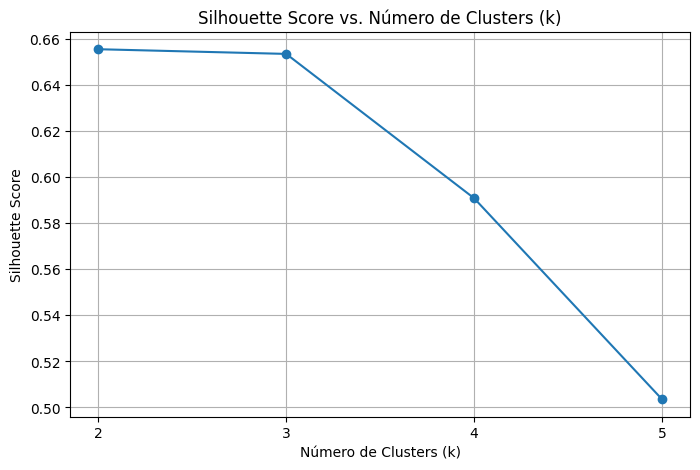

In [ ]:
silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=15)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"Silhouette score para k = {k}: {score:.4f}")

# Gráfico del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Número de Clusters (k)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_values)
plt.show()

### Evaluación del Modelo 1 (Renta + Antigüedad)

Se utilizaron dos enfoques complementarios:

### 1. Método del Codo (SSE)
El método del codo permite observar la disminución de la **suma de los errores al cuadrado (SSE)** conforme se incrementa el número de clusters. La inflexión en la curva indica un punto a partir del cual agregar más clusters no mejora significativamente la compactación del modelo.

- El codo se detectó en **k = 3**
- Valor de SSE correspondiente: `25420.19`

### 2. Silhouette Score
El **silhouette score** evalúa qué tan bien separados y cohesionados están los clusters formados. Este índice oscila entre -1 y 1, donde valores más altos indican una mejor estructura de agrupamiento.

| k | Silhouette Score |
|---|------------------|
| 2 | **0.6557**       |
| 3 | 0.6536           |
| 4 | 0.5909           |
| 5 | 0.5036           |

Aunque el codo sugiere k = 3 como punto de inflexión, el mayor **silhouette score** se obtiene con **k = 2**, y dicho valor decae progresivamente a medida que se incrementa k.

---

### ✅ Conclusión
Se elige **n_clusters = 2** para el Modelo 1, dado que:
- Maximiza la separación relativa entre grupos según el silhouette score.
- Permite una interpretación más clara de los clusters generados, manteniendo la simplicidad del modelo.
- La leve mejora en compacidad al usar k = 3 no compensa la pérdida de cohesión relativa.

Esta configuración es coherente con el objetivo del modelo: obtener una segmentación inicial basada en patrones simples pero significativos en el comportamiento de renta y antigüedad.


### Creación y entrenamiento del modelo

In [ ]:
kmeans_modelo_1 = KMeans(n_clusters=2, n_init="auto", random_state=15).fit(X)
centroids = kmeans_modelo_1.cluster_centers_
print(centroids)

[[ 0.05948682  1.62419397]
 [-0.0160917  -0.43935862]]


### Distribución de los Clusters

In [ ]:
labels_test = kmeans_modelo_1.fit_predict(X)
unique, counts = np.unique(labels_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} puntos")

Cluster 0: 10930 puntos
Cluster 1: 40194 puntos


### 🧠 Resultados del Modelo 1: Clustering con Renta y Antigüedad

Se implementó el algoritmo **K-Means** para segmentar a los clientes en función de sus características financieras, utilizando las variables **Renta** y **Antigüedad**, previamente escaladas. Estas dos dimensiones permiten aproximarse al perfil económico y a la relación histórica del cliente con la institución.

---

### 🔧 Parámetros del Modelo
- **Variables utilizadas:** `Renta` y `Antigüedad` (escaladas mediante `StandardScaler`)
- **Número de clusters (k):** 2
- **random_state:** 15

---

### 📊 Métricas Clave
- **Silhouette Score:** `0.65` — indica una **buena cohesión y separación** entre los clusters formados.
- **Distribución de clientes por cluster:**
  - Cluster 0: 10.930 clientes
  - Cluster 1: 40.194 clientes
- **Coordenadas de los centroides (en datos escalados):**

| Cluster | Renta (scaled) | Antigüedad (scaled) |
|---------|----------------|----------------------|
| 0       | 0.059          | 1.624                |
| 1       | -0.016         | -0.439               |

---

### 🔍 Interpretación de los Grupos
- **Cluster 0:** Agrupa a clientes con **mayor antigüedad** y una renta **ligeramente superior al promedio**. Este segmento puede representar perfiles consolidados, con relaciones más estables y posiblemente mayor valor estratégico.
  
- **Cluster 1:** Reúne a clientes con **menor antigüedad** y renta **ligeramente inferior a la media**, posiblemente representando perfiles más recientes o en etapas tempranas de vinculación con el banco.

---

### ✅ Conclusión

El modelo logra una **segmentación clara y coherente** desde la perspectiva de negocio, diferenciando dos perfiles de cliente bien definidos. El silhouette score de `0.65` valida la calidad del agrupamiento, sugiriendo que las observaciones están bien asignadas a sus respectivos clusters sin indicios de sobreajuste.


## Modelo de segmentación usando 4 o más variables

### Selección de las variables

In [ ]:
X_2 = np.array(scaled_df_3[["Renta_scaled", "Antiguedad_scaled", "CUPO_L1_scaled", "Txs_T12_scaled"]])

### Selección de número de clusters óptimo

In [ ]:
sse_2 = []
for k in range(2, 21):
  kkmeans_2 = KMeans(n_clusters=k, n_init="auto", random_state=42).fit(X_2)
  sse_2.append(kkmeans_2.inertia_)

kl_2 = KneeLocator(range(2, 21), sse_2, curve="convex", direction="decreasing")
print("El codo está en k =", kl_2.elbow)
print("El SSE =", kl_2.all_elbows_y)

El codo está en k = 7
El SSE = [np.float64(55158.90335896957)]


Se aplicó el método del codo (elbow method) para determinar el valor óptimo de `k` (número de clusters) evaluando el Error Cuadrático Total (SSE). El resultado obtenido fue:

- 📌 **Codo detectado en** `k = 7`
- 🧮 **SSE en ese punto**: 55.158,90

Silhouette score para k = 2: 0.4844
Silhouette score para k = 3: 0.4936
Silhouette score para k = 4: 0.4937
Silhouette score para k = 5: 0.4727
Silhouette score para k = 6: 0.3725


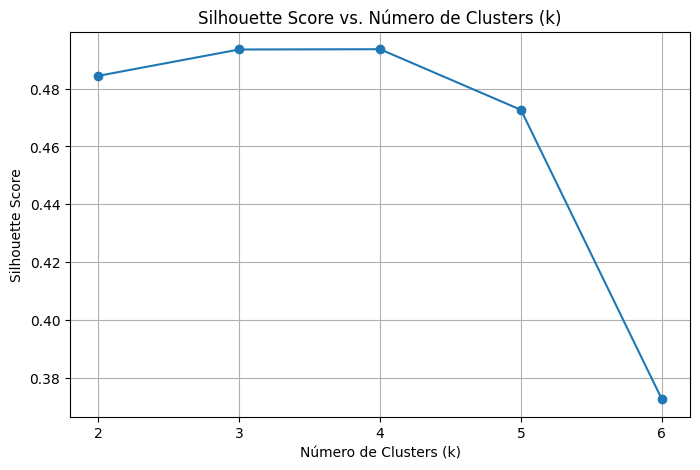

In [ ]:
silhouette_scores = []
k_values = range(2, 7)

for k in k_values:
    kmeans_test_k = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = kmeans_test_k.fit_predict(X_2)
    score = silhouette_score(X_2, labels)
    silhouette_scores.append(score)
    print(f"Silhouette score para k = {k}: {score:.4f}")

# Gráfico del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Número de Clusters (k)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_values)
plt.show()

### Evaluación del Modelo 2 (Renta + Antiguedad + Txs_T12 + CUPO_L1)

En esta segunda iteración del análisis, se construyó un modelo de clustering utilizando las siguientes cuatro variables escaladas: `Renta`, `Antigüedad`, `CUPO_L1` y `Txs_T12`.

---

### 📈 Métrica de calidad de clustering: Silhouette Score

Se evaluó la cohesión y separación de los clusters mediante la métrica **Silhouette Score**, que varía entre -1 y 1 (mayor es mejor). Los resultados fueron:

| Número de Clusters (k) | Silhouette Score |
|------------------------|------------------|
| 2                      | 0.4844           |
| 3                      | 0.4936           |
| 4                      | 0.4937           |
| 5                      | 0.4727           |

---

### 🧠 Interpretación de los hallazgos

Aunque el método del codo sugiere un valor óptimo de `k = 7`, los **Silhouette Scores alcanzan su máximo en `k = 4` (0.4937)** y se mantienen bastante similares en `k = 3` (0.4936), con valores ligeramente menores en `k = 2` y `k = 5`.

---

### ✅ Conclusión

A pesar de que `k = 7` minimiza el SSE, los Silhouette Scores no respaldan claramente esta elección. Por lo tanto, en próximas secciones se analizarán los resultados de los clustering para diferentes valores de `k` a fin de escoger el más representativo y útil para el negocio.

In [ ]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = kmeans.fit_predict(X_2)
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\nResultados para k = {k}:")
    for u, c in zip(unique, counts):
        print(f"  Cluster {u}: {c} puntos")


Resultados para k = 2:
  Cluster 0: 38489 puntos
  Cluster 1: 12635 puntos

Resultados para k = 3:
  Cluster 0: 35998 puntos
  Cluster 1: 4367 puntos
  Cluster 2: 10759 puntos

Resultados para k = 4:
  Cluster 0: 35975 puntos
  Cluster 1: 4386 puntos
  Cluster 2: 10760 puntos
  Cluster 3: 3 puntos

Resultados para k = 5:
  Cluster 0: 34905 puntos
  Cluster 1: 4158 puntos
  Cluster 2: 4249 puntos
  Cluster 3: 3 puntos
  Cluster 4: 7809 puntos


### 🔎 Análisis de Distribución de los cluster para diferentes valores `k`

A continuación se presentan los resultados de la distribución de clientes en cada cluster para distintos valores de `k`, utilizando las variables escaladas `Renta`, `Antigüedad`, `Txs_T12` y `CUPO_L1`.

---

### 📊 Distribución de clientes por cantidad de clusters

`k = 2`
- Cluster 0: 38,489 clientes  
- Cluster 1: 12,635 clientes  

`k = 3`
- Cluster 0: 35,998 clientes  
- Cluster 1: 4,367 clientes  
- Cluster 2: 10,759 clientes  

`k = 4`
- Cluster 0: 35,975 clientes  
- Cluster 1: 4,386 clientes  
- Cluster 2: 10,760 clientes  
- Cluster 3: 3 clientes  

`k = 5`
- Cluster 0: 34,905 clientes  
- Cluster 1: 4,158 clientes  
- Cluster 2: 4,249 clientes  
- Cluster 3: 3 clientes  
- Cluster 4: 7,809 clientes  

---

### 🧠 Interpretación

- `k = 2` ofrece una segmentación clara y balanceada, con una división que podría representar dos grandes perfiles de cliente, sin presencia de agrupaciones pequeñas o ruidosas.
  
- `k = 3` introduce un tercer grupo de tamaño razonable (10.759 clientes), pero también aparece un cluster pequeño (4.367), lo que podría indicar la presencia de un subgrupo más específico o una posible transición entre dos grupos mayores.

- `k = 4 y k = 5` empiezan a mostrar **clusters con muy pocos clientes (3 en ambos casos)**. Estos grupos tan pequeños no son estables ni confiables y podrían representar **outliers** o casos extremos más que segmentos reales del negocio.

- El crecimiento de `k` a 5 también fragmenta los clusters grandes en varios medianos, pero **sin una ganancia clara de interpretación**, y aumentando el riesgo de **sobresegmentación**.

---

### ✅ Conclusión

La estructura de los datos sugiere que **los valores de `k = 2` y `k = 3` son los más razonables**, ya que mantienen una buena separación entre grupos sin crear clusters irrelevantes o artificiales. La aparición de micro-clusters con pocos datos al aumentar `k` indica que los datos no sustentan más de tres agrupaciones significativas en términos de negocio. Se decide utilizar `k = 3`, dado que posee un Silhoutte Scorre más alto que `k = 2`

### Creación y entrenamiento del modelo

In [ ]:
kmeans_modelo_2 = KMeans(n_clusters=3, n_init="auto", random_state=42).fit(X_2)
centroids_modelo_2 = kmeans_modelo_2.cluster_centers_
print(centroids_modelo_2)

[[-0.03204425 -0.44849284 -0.38632947 -0.28837422]
 [ 0.06424396  0.21676844  0.0785      2.52545364]
 [ 0.08118019  1.41208723  1.26011848 -0.05671722]]


### 🧠 Resultados del Modelo 2: Clustering con Renta, Antigüedad, Transacción en el Mes 12, y Límite de Crédito

En esta segunda iteración del análisis, se aplicó el algoritmo **K-Means** utilizando un conjunto de **cuatro variables escaladas**: `Renta`, `Antigüedad`, `CUPO_L1` y `Txs_T12`. Estas variables buscan capturar una visión más completa del perfil financiero y de comportamiento de los clientes.

---

### 🔧 Parámetros del Modelo
- **Variables utilizadas:** `Renta`, `Antigüedad`, `CUPO_L1`, `Txs_T12` (todas escaladas con `StandardScaler`)
- **Número de clusters (k):** 3
- **random_state:** 15

---

### 📊 Métricas Clave
- **Silhouette Score:** `0.4936` — una **cohesión y separación moderada**, indicando que la estructura de los clusters es útil aunque no perfectamente definida.
- **Distribución de clientes por cluster:**
  - Cluster 0: 35.998 clientes
  - Cluster 1: 4.367 clientes
  - Cluster 2: 10.759 clientes

---

### 🔍 Interpretación de los Grupos
- **Cluster 0:** Representa el grupo más numeroso, lo que sugiere que muchos clientes comparten un perfil común en términos de renta, cupo y antigüedad.
  
- **Cluster 1:** Es considerablemente más pequeño, lo que podría indicar un **grupo especializado o un nicho** con características financieras particulares, por ejemplo: cupo alto pero transacciones bajas, o bien clientes con un comportamiento atípico.

- **Cluster 2:** Representa un grupo intermedio, posiblemente con un **perfil financiero mixto**, que podría ser objeto de estrategias comerciales diferenciadas.

---

### ✅ Conclusión

El Modelo 2 permite una **segmentación más rica y granular** que el Modelo 1, introduciendo dimensiones de comportamiento y riesgo financiero (como `Txs_T12` y `CUPO_L1`). Si bien el Silhouette Score no supera el 0.5 la segmentación obtenida sigue siendo útil para análisis exploratorios y para definir estrategias dirigidas a grupos específicos.

### Aplicación de PCA

-------------------------------------------------------
Porcentaje de varianza explicada por cada componente
-------------------------------------------------------
[0.40033175 0.24858714 0.23378943 0.11729169]


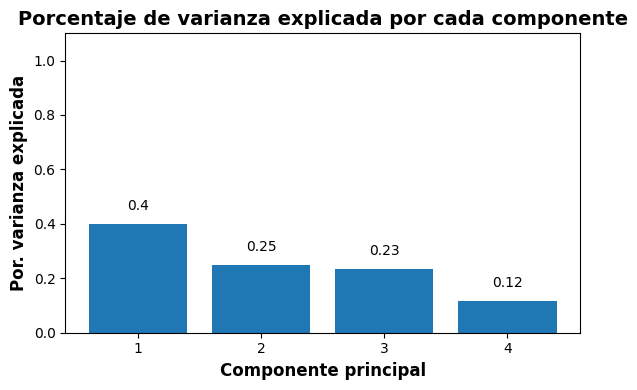

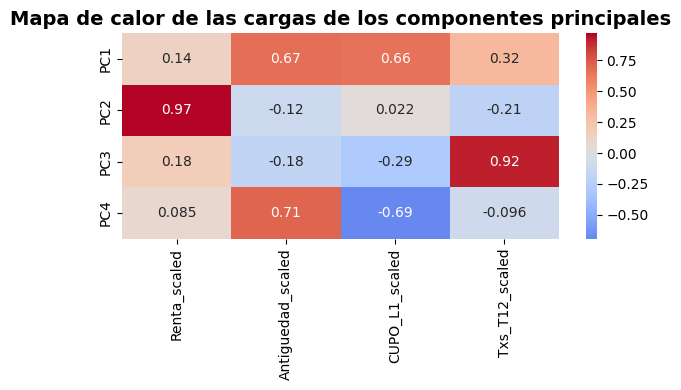

Cargas de los componentes principales:
     Renta_scaled  Antiguedad_scaled  CUPO_L1_scaled  Txs_T12_scaled
PC1          0.14               0.67            0.66            0.32
PC2          0.97              -0.12            0.02           -0.21
PC3          0.18              -0.18           -0.29            0.92
PC4          0.08               0.71           -0.69           -0.10


In [ ]:
pca = PCA()
pca.fit(X_2)

print('-'*55)
print('Porcentaje de varianza explicada por cada componente')
print('-'*55)
print(pca.explained_variance_ratio_)

# Gráfico de varianza explicada
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(
    x=np.arange(pca.n_components_) + 1,
    height=pca.explained_variance_ratio_
)

# Anotar cada barra con su valor
for x, y in zip(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente', fontsize=14, fontweight="bold")
ax.set_xlabel('Componente principal', fontsize=12, fontweight="bold")
ax.set_ylabel('Por. varianza explicada', fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

# Mapa de calor de las cargas
loadings = pd.DataFrame(
    pca.components_,
    columns=scaled_df_3.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

plt.figure(figsize=(6, 4))
sb.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de calor de las cargas de los componentes principales", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

pd.set_option('display.float_format', '{:.2f}'.format)  # Formato bonito
print("Cargas de los componentes principales:")
print(loadings)

In [ ]:
pca = PCA(n_components=1)
pca.fit(X_2)

PCA(n_components=1)

In [ ]:
pca_components = pd.DataFrame(
    data    = pca.components_,
    columns = scaled_df_3.columns,
    index   = ['PC1']
).T
pca_components

,PC1
Renta_scaled,0.14
Antiguedad_scaled,0.67
CUPO_L1_scaled,0.66
Txs_T12_scaled,0.32


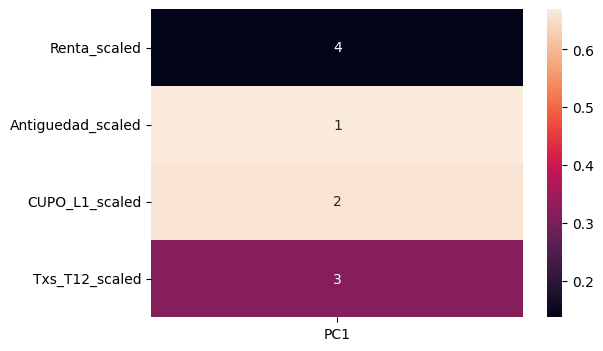

In [ ]:
plt.figure(figsize=(6,4))
sb.heatmap(pca_components,  annot=pca_components.rank(axis="rows", ascending = False));

### 📊 Análisis de Componentes Principales (PCA) - Modelo 2

Se aplicó **Análisis de Componentes Principales (PCA)** sobre las variables escaladas del Modelo 2: `Renta`, `Antigüedad`, `CUPO_L1` y `Txs_T12`. El objetivo fue **identificar la contribución relativa de cada variable** en la estructura de los datos y entender cómo se agrupan de manera no supervisada.

---

### 🔎 Varianza explicada por componente

| Componente | % Varianza Explicada |
|------------|-----------------------|
| PC1        | 40.03%                |
| PC2        | 24.86%                |
| PC3        | 23.38%                |
| PC4        | 11.73%                |

Los **dos primeros componentes explican aproximadamente el 65% de la varianza total** de los datos, y los **tres primeros explican más del 88%**, lo cual es adecuado para análisis de reducción de dimensionalidad o visualización en 2D/3D.

---

### 💡 Cargas de los componentes principales

Las cargas (loadings) representan la influencia de cada variable original en cada componente principal:

#### PC1 (40.03% de varianza)
- Predominan `Antigüedad` (0.67) y `CUPO_L1` (0.66)
- También influye `Txs_T12` (0.32) de forma moderada
- `Renta` tiene poca influencia directa (0.14)

**Interpretación:** Este componente parece capturar la relación entre **trayectoria del cliente y cupo asignado**, posiblemente reflejando estabilidad y perfil crediticio.

#### PC2 (24.86% de varianza)
- Alta carga en `Renta` (0.97), que domina completamente este componente
- El resto de las variables apenas influyen

**Interpretación:** Este componente representa **exclusivamente la dimensión de ingreso del cliente**.

#### PC3 (23.38% de varianza)
- Alta carga en `Txs_T12` (0.92), baja influencia de otras variables

**Interpretación:** Captura el comportamiento **transaccional**, indicando frecuencia o actividad del cliente.

#### PC4 (11.73% de varianza)
- Cargas mixtas sin un patrón dominante
- `Antigüedad` (0.71) y `CUPO_L1` (-0.69) tienen pesos opuestos

**Interpretación:** Componente menos relevante, podría reflejar interacciones residuales entre antigüedad y cupo.

---

### ✅ Conclusiones

- Los primeros **tres componentes principales resumen eficazmente la mayoría de la varianza del dataset** (88.28%), lo cual valida su utilidad para visualización o reducción de dimensiones.
- `Renta`, `CUPO_L1`, `Antigüedad` y `Txs_T12` capturan **dimensiones distintas del comportamiento del cliente**, lo cual justifica su inclusión en el modelo.
- La estructura revelada por PCA respalda el uso de estos atributos para clustering, ya que aportan **información complementaria**.

Se recomienda usar al menos los primeros dos componentes si se busca visualización o análisis simplificado, o mantener las cuatro variables si se prioriza la retención de información.
